<a href="https://colab.research.google.com/github/antahiap/dsr-b35/blob/main/dsr-time-series/notebooks/05_exponential_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Load the dataset
file_path = 'https://raw.githubusercontent.com/andandandand/time-series-dsr/main/time_series_data/airPassengers.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataset
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


(     Month  Passengers
 0  1949-01         112
 1  1949-02         118
 2  1949-03         132
 3  1949-04         129
 4  1949-05         121,
 None,
        Passengers
 count  144.000000
 mean   280.298611
 std    119.966317
 min    104.000000
 25%    180.000000
 50%    265.500000
 75%    360.500000
 max    622.000000)

# Data Loading and Exploration

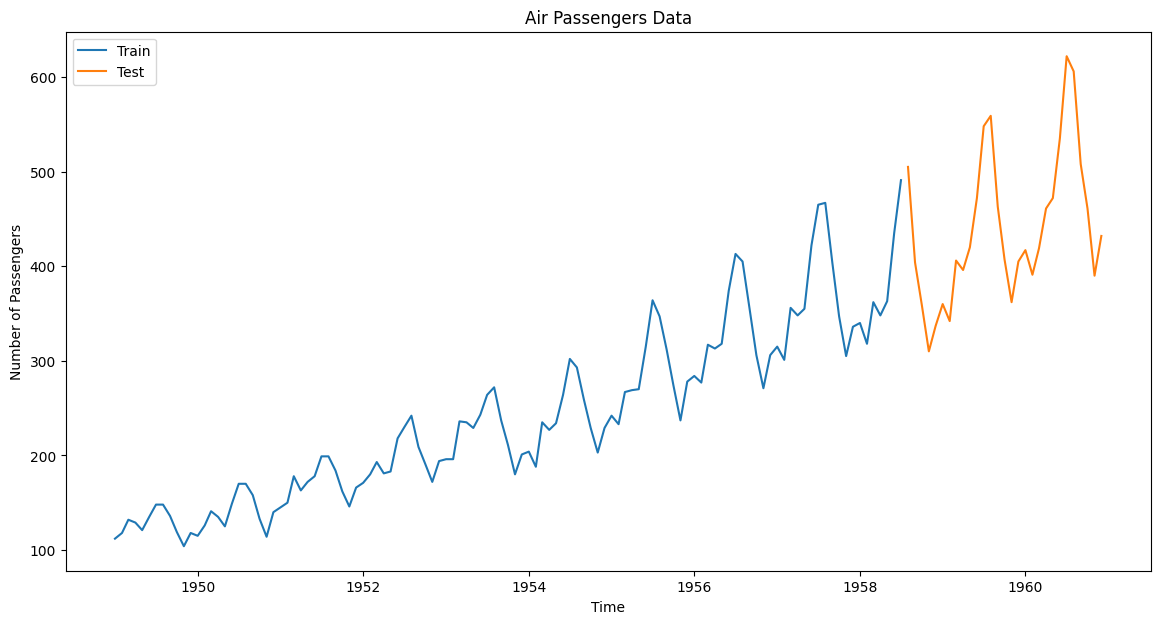

((115, 1), (29, 1))

In [6]:
# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Plot the training and testing data
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.title('Air Passengers Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

train.shape, test.shape


# The Baseline Method.

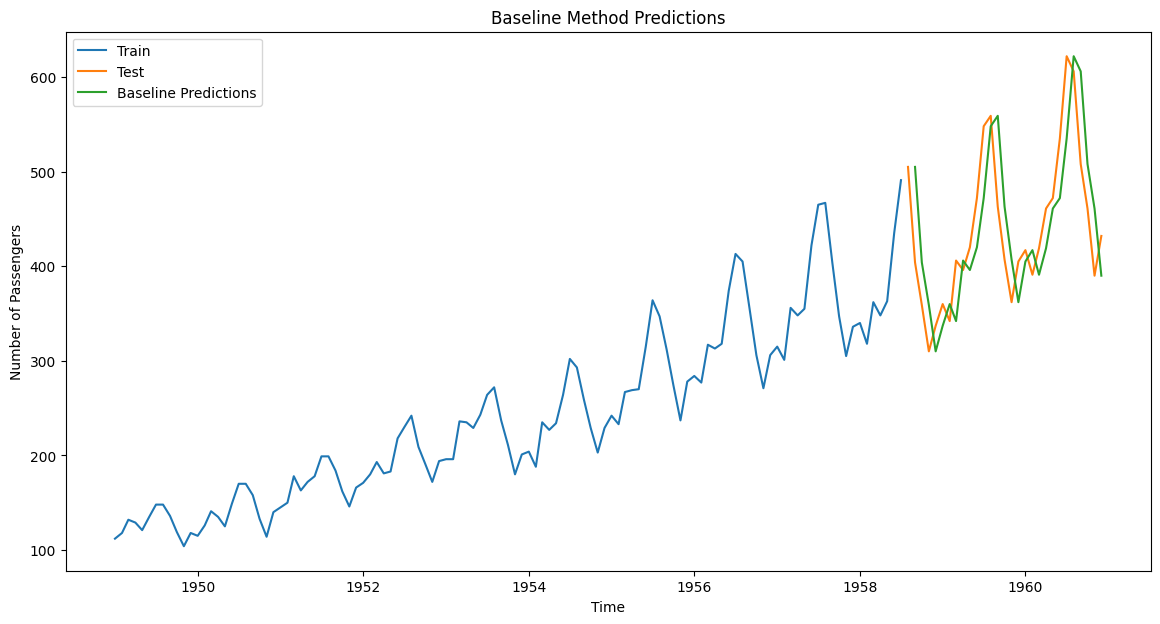

45.82142857142857

In [7]:
# Baseline Method: Predicting the next observation as the current observation
baseline_predictions = test.shift(1)

# Calculate the Mean Absolute Error (MAE) for the baseline method
baseline_mae = mean_absolute_error(test[1:], baseline_predictions[1:])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, baseline_predictions, label='Baseline Predictions')
plt.title('Baseline Method Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

baseline_mae


# Moving Averages

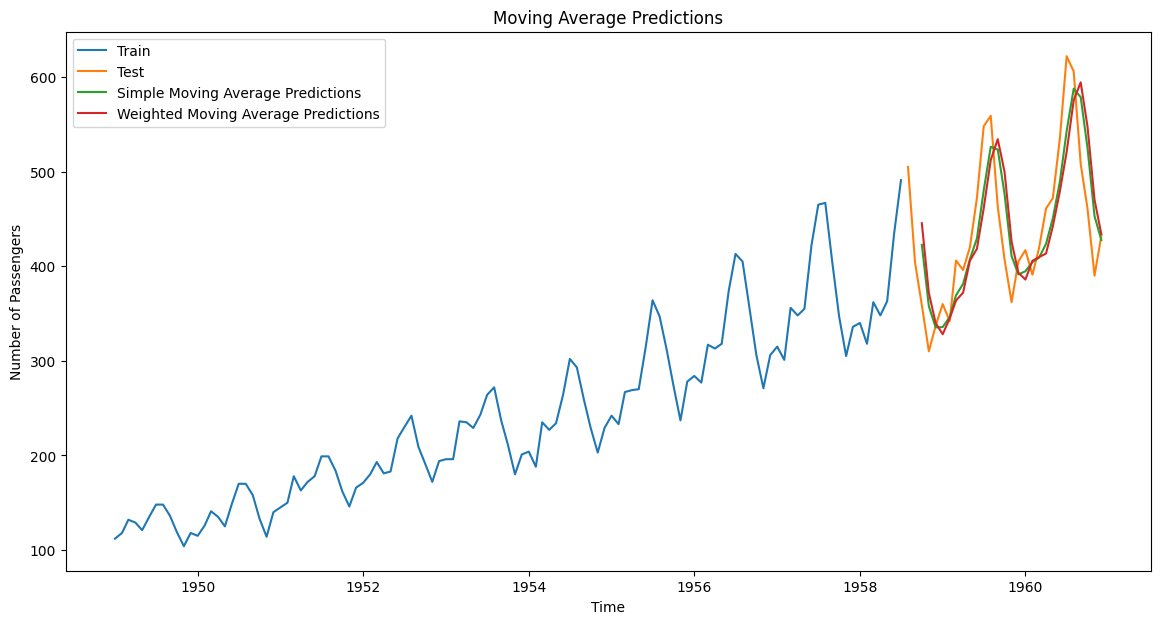

(36.67901234567901, 47.003703703703685)

In [9]:
# Moving Averages: Simple and Weighted

# Simple Moving Average with a window size of 3
sma_predictions = test['Passengers'].rolling(window=3).mean()

# Weighted Moving Average with weights [0.5, 0.3, 0.2]
weights = np.array([0.5, 0.3, 0.2])
wma_predictions = test['Passengers'].rolling(window=3).apply(lambda x: np.dot(x, weights), raw=True)

# Calculate the MAE for Simple and Weighted Moving Averages
sma_mae = mean_absolute_error(test[2:], sma_predictions[2:])
wma_mae = mean_absolute_error(test[2:], wma_predictions[2:])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, sma_predictions, label='Simple Moving Average Predictions')
plt.plot(test.index, wma_predictions, label='Weighted Moving Average Predictions')
plt.title('Moving Average Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

sma_mae, wma_mae


# Simple Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


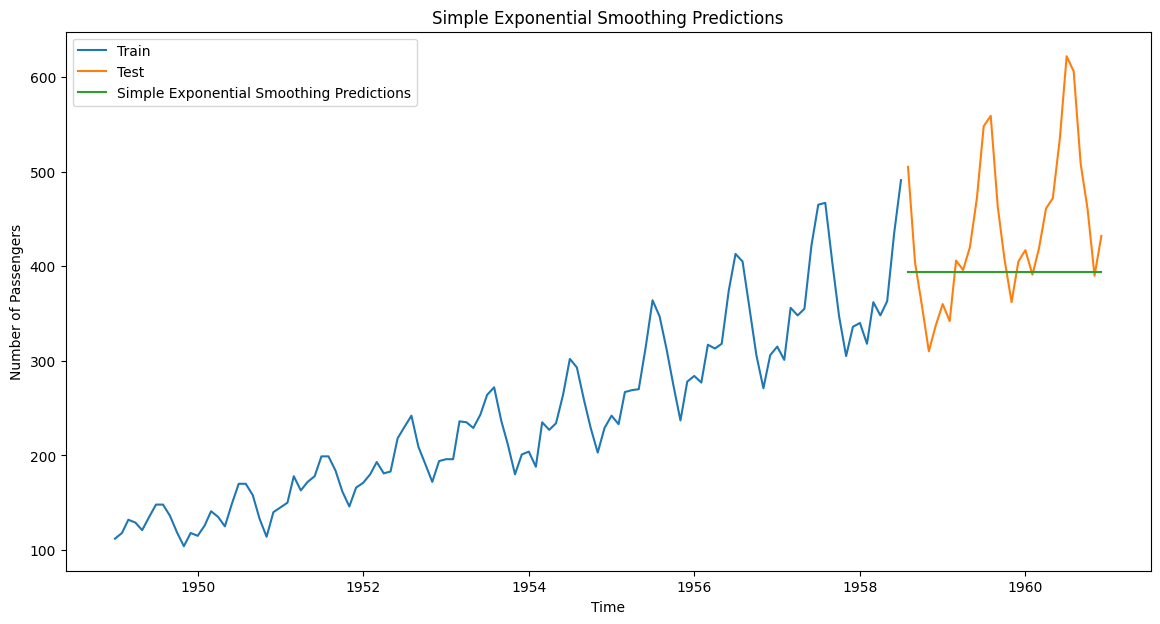

66.93188618480598

In [10]:
# Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
ses_predictions = model_ses.forecast(len(test))

# Calculate MAE for Simple Exponential Smoothing
ses_mae = mean_absolute_error(test, ses_predictions)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, ses_predictions, label='Simple Exponential Smoothing Predictions')
plt.title('Simple Exponential Smoothing Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

ses_mae


# Holt's Linear Exponential Smoothing

Holt's Linear Exponential Smoothing

Holt's method extends Simple Exponential Smoothing to capture linear trends in the data. The equations are:

$$
Levelt=α×Observationt+(1−α)×(Levelt−1+Trendt−1)\text{Level}_{t} = \alpha \times \text{Observation}_{t} + (1 - \alpha) \times (\text{Level}_{t-1} + \text{Trend}_{t-1})
Levelt​=α×Observationt​+(1−α)×(Levelt−1​+Trendt−1​)
Trendt=β×(Levelt−Levelt−1)+(1−β)×Trendt−1\text{Trend}_{t} = \beta \times (\text{Level}_{t} - \text{Level}_{t-1}) + (1 - \beta) \times \text{Trend}_{t-1}
Trendt​=β×(Levelt​−Levelt−1​)+(1−β)×Trendt−1​
Predictiont+1=Levelt+Trendt\text{Prediction}_{t+1} = \text{Level}_{t} + \text{Trend}_{t}
Predictiont+1​=Levelt​+Trendt​
$$

Where:

    α\alphaα is the smoothing parameter for the level.
    β\betaβ is the smoothing parameter for the trend.

Both α\alphaα and β\betaβ are between 0 and 1.
Results:

    MAE for Holt's: Approximately 60.8660.8660.86

Holt's method does a slightly better job of capturing the trend compared to SES, but still fails to capture the seasonality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-11-e5e0acbc67bc>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['Passengers']).fit(smoothing_level=0.2, smoothing_slope=0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


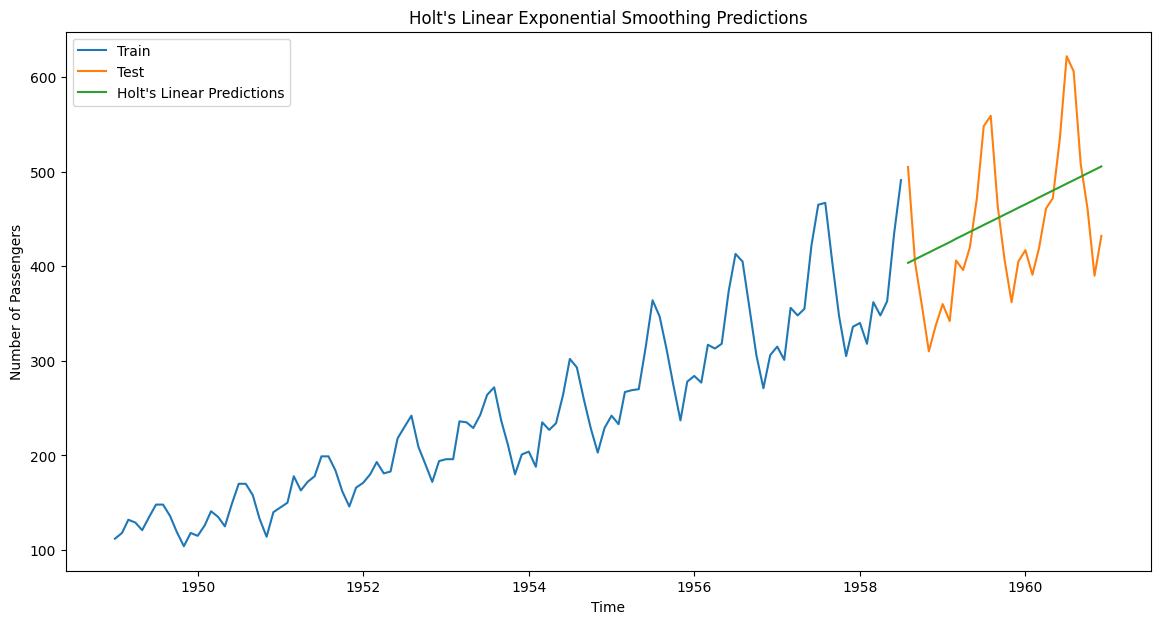

60.86304636373567

In [11]:
# Holt's Linear Exponential Smoothing
model_holt = Holt(train['Passengers']).fit(smoothing_level=0.2, smoothing_slope=0.1)
holt_predictions = model_holt.forecast(len(test))

# Calculate MAE for Holt's Linear Exponential Smoothing
holt_mae = mean_absolute_error(test, holt_predictions)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, holt_predictions, label="Holt's Linear Predictions")
plt.title("Holt's Linear Exponential Smoothing Predictions")
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

holt_mae


# Holt-Winters' Seasonal Exponential Smoothing

Holt-Winters' Seasonal Exponential Smoothing

Holt-Winters' method extends Holt's Linear Exponential Smoothing to also capture seasonality in the data. The equations are a bit more complex but can be summarized as:
$$
Levelt=α×(Observationt−Seasonalt−m)+(1−α)×(Levelt−1+Trendt−1)\text{Level}_{t} = \alpha \times (\text{Observation}_{t} - \text{Seasonal}_{t-m}) + (1 - \alpha) \times (\text{Level}_{t-1} + \text{Trend}_{t-1})
Levelt​=α×(Observationt​−Seasonalt−m​)+(1−α)×(Levelt−1​+Trendt−1​)
Trendt=β×(Levelt−Levelt−1)+(1−β)×Trendt−1\text{Trend}_{t} = \beta \times (\text{Level}_{t} - \text{Level}_{t-1}) + (1 - \beta) \times \text{Trend}_{t-1}
Trendt​=β×(Levelt​−Levelt−1​)+(1−β)×Trendt−1​
Seasonalt=γ×(Observationt−Levelt)+(1−γ)×Seasonalt−m\text{Seasonal}_{t} = \gamma \times (\text{Observation}_{t} - \text{Level}_{t}) + (1-\gamma) \times \text{Seasonal}_{t-m}
Seasonalt​=γ×(Observationt​−Levelt​)+(1−γ)×Seasonalt−m​
Predictiont+m=Levelt+m×Trendt+Seasonalt−m\text{Prediction}_{t+m} = \text{Level}_{t} + m \times \text{Trend}_{t} + \text{Seasonal}_{t-m}
Predictiont+m​=Levelt​+m×Trendt​+Seasonalt−m​
$$

Where:

    α\alphaα is the smoothing parameter for the level.
    β\betaβ is the smoothing parameter for the trend.
    γ\gammaγ is the smoothing parameter for the seasonality.
    mmm is the seasonal period.

Results:

    MAE for Holt-Winters': Approximately 67.2567.2567.25

As seen in the plot, Holt-Winters' method attempts to capture both the trend and the seasonality in the data, but it seems to have a relatively high MAE.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


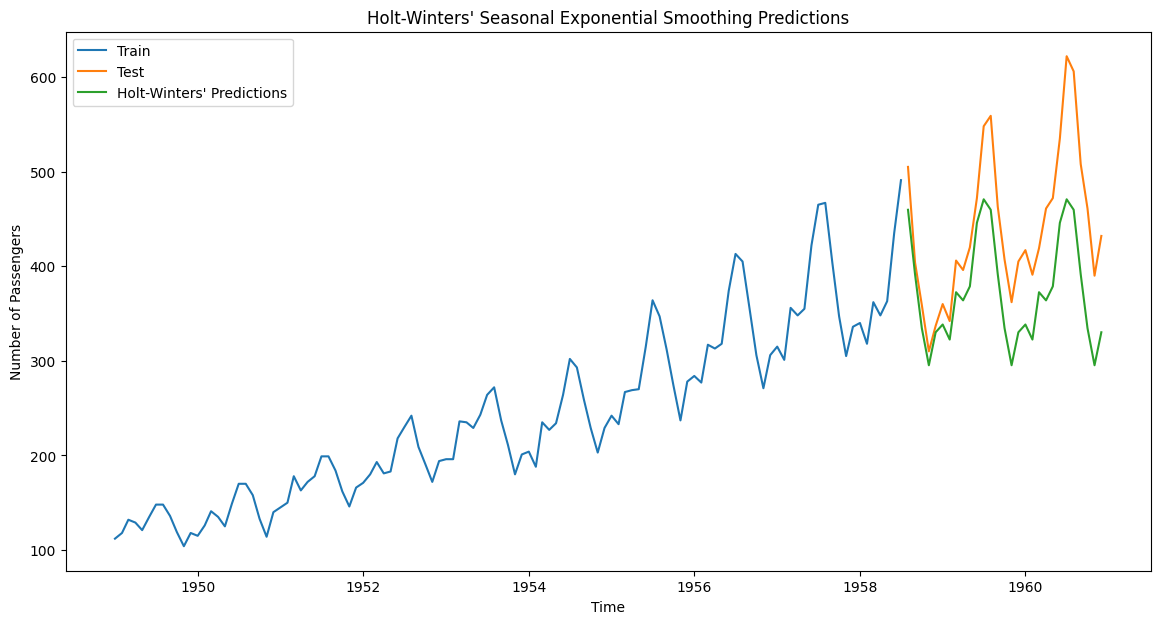

67.25504462180012

In [12]:
# Holt-Winters' Seasonal Exponential Smoothing
model_hw = ExponentialSmoothing(train['Passengers'], seasonal='add', seasonal_periods=12).fit()
hw_predictions = model_hw.forecast(len(test))

# Calculate MAE for Holt-Winters' Seasonal Exponential Smoothing
hw_mae = mean_absolute_error(test, hw_predictions)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, hw_predictions, label="Holt-Winters' Predictions")
plt.title("Holt-Winters' Seasonal Exponential Smoothing Predictions")
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

hw_mae


# Theta Model

The Theta model is a hybrid model that combines different forecasting methods. Here, we used Simple Exponential Smoothing on a de-seasonalized series and then re-seasonalized the forecast. The steps can be summarized as:

    De-seasonalize the series: Divide the original series by its seasonal mean.
    Forecast using SES: Apply Simple Exponential Smoothing to the de-seasonalized series.
    Re-seasonalize the forecast: Multiply the forecast by the last seasonal mean values to get the final forecast.

Results:

    MAE for Theta Model: Approximately 77.6177.6177.61

As seen in the plot, the Theta model does not perform as well as some of the other methods we've tried, but it's still a useful tool in the forecasting toolbox.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


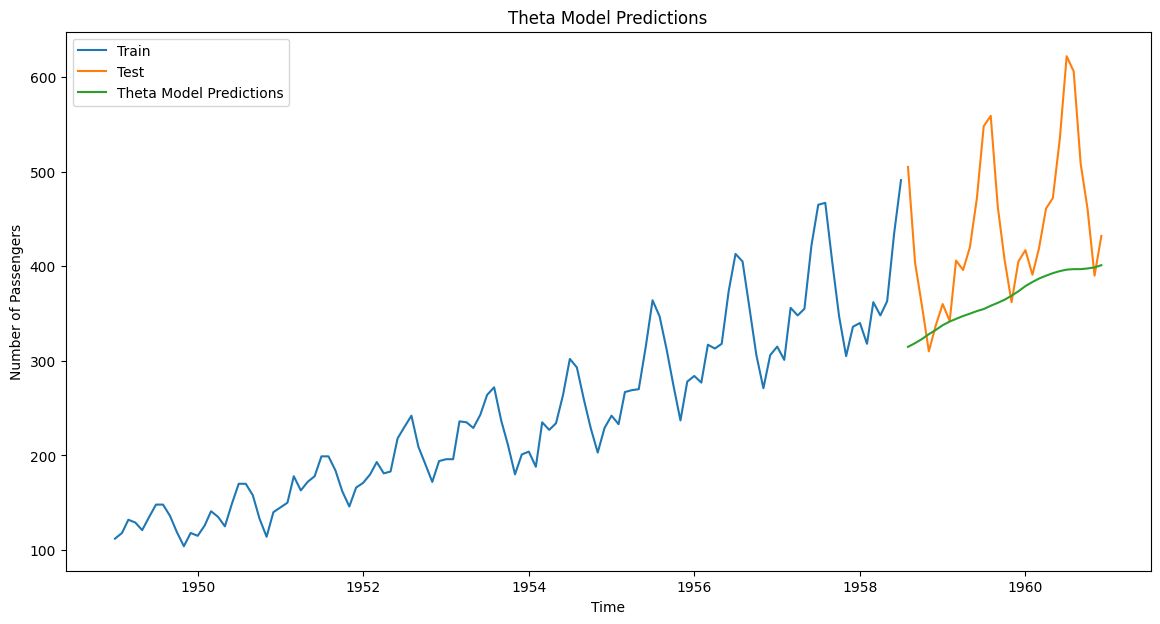

77.60888324420002

In [13]:
# Implementing Theta Model manually as it's not available in the current version of statsmodels

# De-seasonalizing the series
seasonal_mean = train['Passengers'].rolling(window=12).mean()
deseasonalized_series = train['Passengers'] / seasonal_mean

# Simple exponential smoothing forecast for deseasonalized series
model_ses_deseasonalized = SimpleExpSmoothing(deseasonalized_series.dropna()).fit(smoothing_level=0.2)
ses_deseasonalized_predictions = model_ses_deseasonalized.forecast(len(test))

# Re-seasonalizing the forecast
reseasonalized_predictions = ses_deseasonalized_predictions * seasonal_mean[-len(test):].values

# Compute MAE for Theta model
theta_mae = mean_absolute_error(test, reseasonalized_predictions)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, reseasonalized_predictions, label='Theta Model Predictions')
plt.title('Theta Model Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

theta_mae


# Summary of MAE for all Models

    Baseline Method: 45.8245.8245.82
    Simple Moving Average: 36.6836.6836.68
    Weighted Moving Average: 47.0047.0047.00
    Simple Exponential Smoothing: 66.9366.9366.93
    Holt's Linear Exponential Smoothing: 60.8660.8660.86
    Holt-Winters' Seasonal Exponential Smoothing: 67.2567.2567.25
    Theta Model: 77.6177.6177.61

Among the methods we've tried, the Simple Moving Average has the lowest MAE and seems to be the best fit for this particular dataset.